In [60]:
import random
import json
import pickle
import numpy as np

import nltk
from nltk.stem import WordNetLemmatizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD

In [61]:
import re
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Morsi Store
[nltk_data]     DZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Morsi Store
[nltk_data]     DZ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Morsi Store
[nltk_data]     DZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
def preprocess_data(data):
    rows = []
    for item in data:
        question = item["question"]
        annotations = item["annotations"]
        for annotation in annotations:
            if annotation["type"] == "multipleQAs":
                for qa in annotation["qaPairs"]:
                    rows.append({
                        "id": item["id"],
                        "question": qa["question"],
                        "answer": qa["answer"][0],
                        "type": annotation["type"]
                    })
            elif annotation["type"] == "singleAnswer":
                rows.append({
                    "id": item["id"],
                    "question": question,
                    "answer": annotation["answer"][0],
                    "type": annotation["type"]
                })
    return pd.DataFrame(rows)


In [63]:
train_light = json.loads(open('train_light.json').read())
with open('train_light.json', 'r') as file:
    train_light = json.load(file)

train_light_df = preprocess_data(train_light)
train_light_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19541 entries, 0 to 19540
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        19541 non-null  object
 1   question  19541 non-null  object
 2   answer    19541 non-null  object
 3   type      19541 non-null  object
dtypes: object(4)
memory usage: 610.8+ KB


In [64]:
# Count the number of each type
type_counts = train_light_df['type'].value_counts()
print(type_counts)


type
multipleQAs     14082
singleAnswer     5459
Name: count, dtype: int64


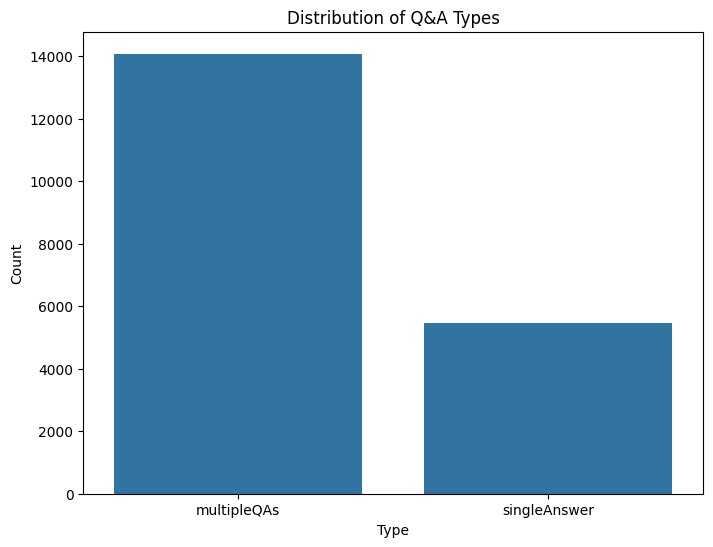

In [65]:
import matplotlib.pyplot as plt

# Plot the distribution of types
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Q&A Types')
plt.show()


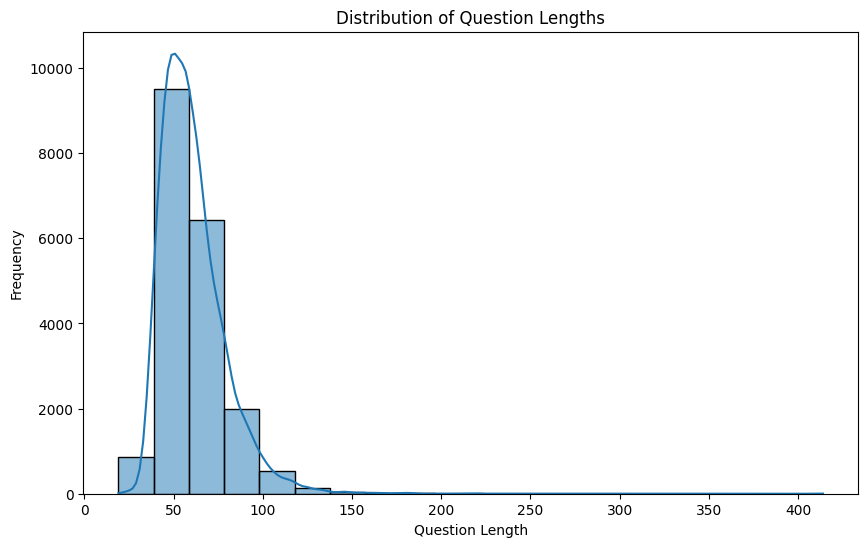

In [66]:
# Add a column for the length of each question
train_light_df['question_length'] = train_light_df['question'].apply(len)

# Plot the distribution of question lengths
plt.figure(figsize=(10, 6))
sns.histplot(train_light_df['question_length'], bins=20, kde=True)
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.title('Distribution of Question Lengths')
plt.show()


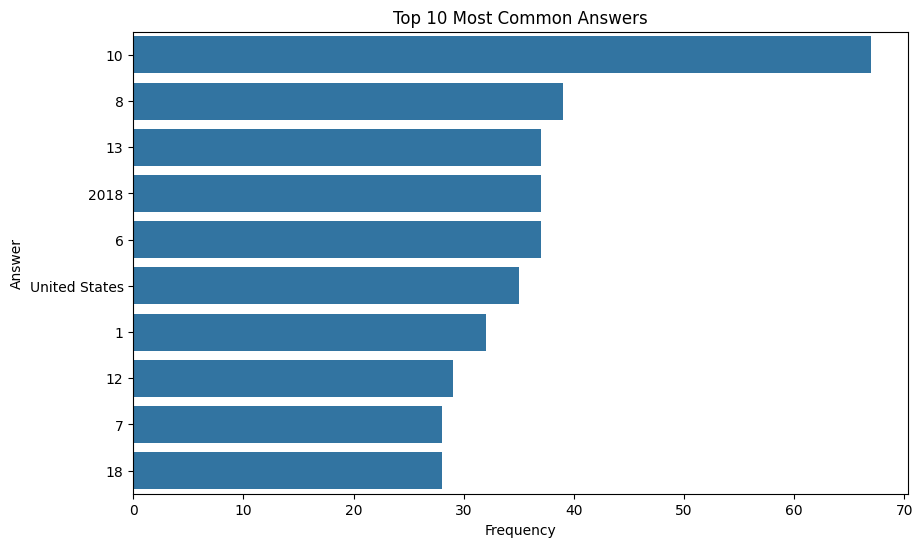

In [67]:
# Count the frequency of each answer
answer_counts = train_light_df['answer'].value_counts().head(10)

# Plot the most common answers
plt.figure(figsize=(10, 6))
sns.barplot(x=answer_counts.values, y=answer_counts.index)
plt.xlabel('Frequency')
plt.ylabel('Answer')
plt.title('Top 10 Most Common Answers')
plt.show()
